<a href="https://colab.research.google.com/github/patternproject/r.sb.gtm1/blob/main/Survey_IT2_RecurringPayment_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read Me

v1 Basic Analysis of Payment Preference for Recurring Subset



In [1]:
# Library
library(ggplot2)
library(tidyverse)
#install.packages("readxl")
library(readxl)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.0.5     ✔ dplyr   1.0.3
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [11]:
# reading in input File
input_file = '/content/Without - Payment Pref - Recurring.xlsx'
df_master = read_xlsx(input_file, sheet=1)

In [12]:
# printing DF
print(as_tibble(df_master))

# A tibble: 49 x 5
   Amount `12-Months` `3-Months` `6-Months` `1-Months`
    <dbl>       <dbl>      <dbl>      <dbl>      <dbl>
 1      0           1         NA         NA          1
 2      1          NA         NA         NA         NA
 3      2           1         NA         NA         NA
 4     14          NA         NA         NA         NA
 5    100           1         NA         NA         NA
 6    200          NA         NA         NA         NA
 7    300           1         NA         NA         NA
 8    400          NA         NA         NA         NA
 9    500           4          1         NA          2
10    600           2          1         NA         NA
# … with 39 more rows


In [13]:
names(df_master)

[1] "Amount"    "12-Months" "3-Months"  "6-Months"  "1-Months"

removing NA

In [19]:
df_master %>% replace_na(list('12-Months' = 0,  '3-Months' = 0, '6-Months' = 0, '1-Months' = 0)) -> df_1

In [20]:
str(df_1)

tibble [49 × 5] (S3: tbl_df/tbl/data.frame)
 $ Amount   : num [1:49] 0 1 2 14 100 200 300 400 500 600 ...
 $ 12-Months: num [1:49] 1 0 1 0 1 0 1 0 4 2 ...
 $ 3-Months : num [1:49] 0 0 0 0 0 0 0 0 1 1 ...
 $ 6-Months : num [1:49] 0 0 0 0 0 0 0 0 0 0 ...
 $ 1-Months : num [1:49] 1 0 0 0 0 0 0 0 2 0 ...


In [46]:
write.csv(df_1,"recurring.csv")

In [24]:
df_1 %>%
  pivot_longer(!Amount, names_to = "method", values_to = "Count") -> df_2

In [48]:
write.csv(df_2,"recurring2.csv")

In [53]:
str(df_2)

tibble [196 × 3] (S3: tbl_df/tbl/data.frame)
 $ Amount: num [1:196] 0 0 0 0 1 1 1 1 2 2 ...
 $ method: chr [1:196] "12-Months" "3-Months" "6-Months" "1-Months" ...
 $ Count : num [1:196] 1 0 0 1 0 0 0 0 1 0 ...


In [54]:
#one approach it to index with the $ sign and the as.factor function
df_2$method_f <- as.factor(df_2$method)

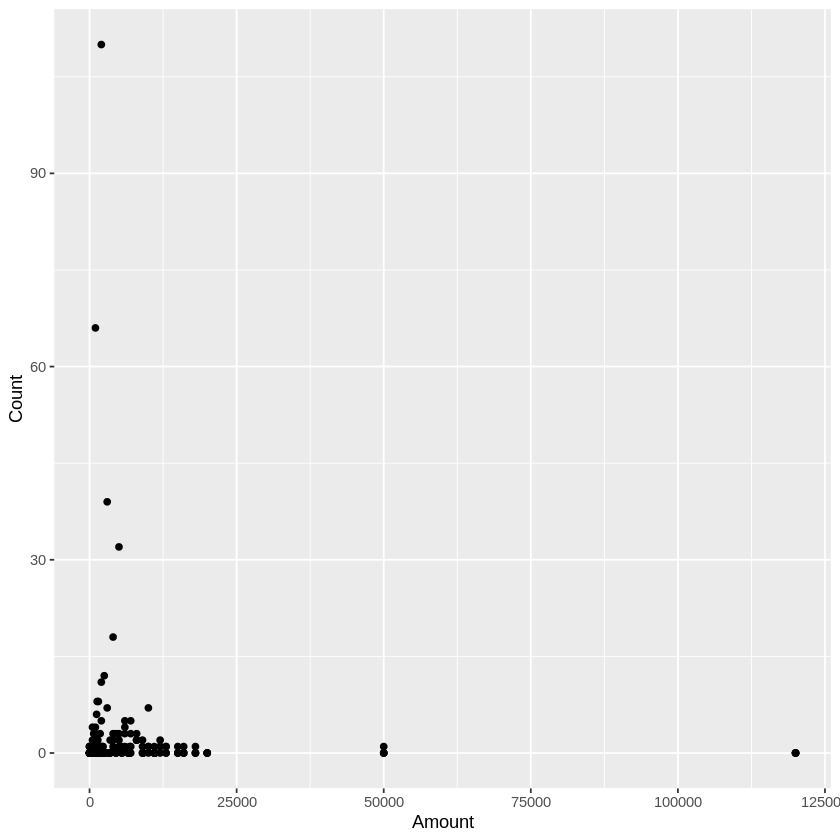

In [55]:
p1 <- ggplot(df_2, aes(x = Amount, y = Count))
# Scatter plot 
p1 <- p1 + geom_point()
p1

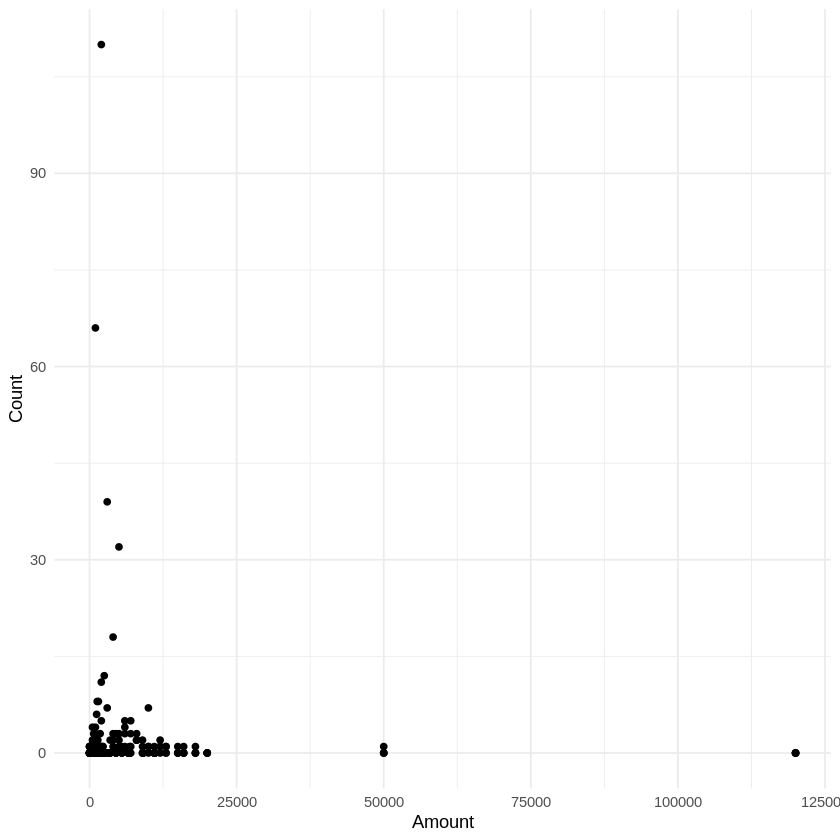

In [56]:
p1 <- p1 + theme_minimal()
p1

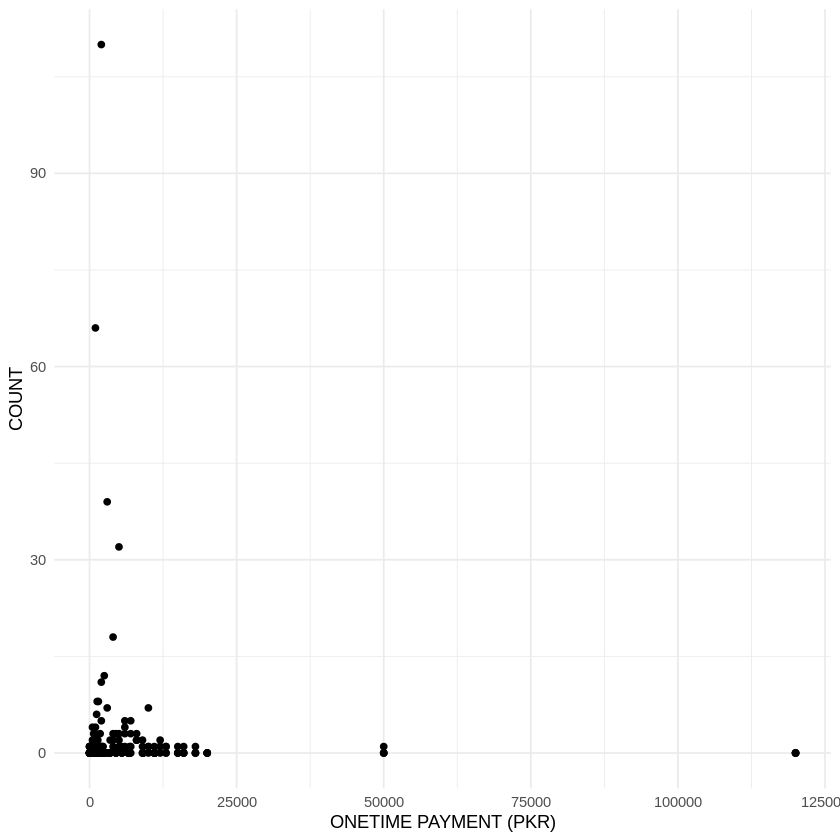

In [57]:
# bars are too little to add data labels
p1 <- p1 + labs(x = "ONETIME PAYMENT (PKR)", y = "COUNT")
p1

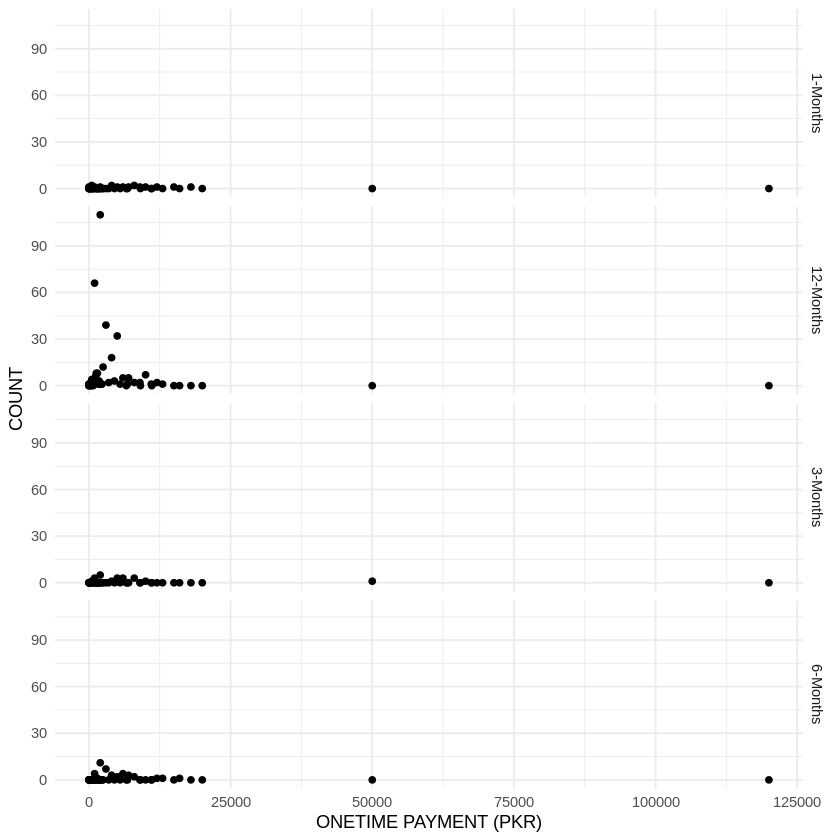

In [58]:
# Split in vertical direction
p1 + facet_grid(method_f ~ .)

In [59]:
# removing outliers of any value above 25000
df_3 <- df_2 %>% filter(Amount <= 25000)

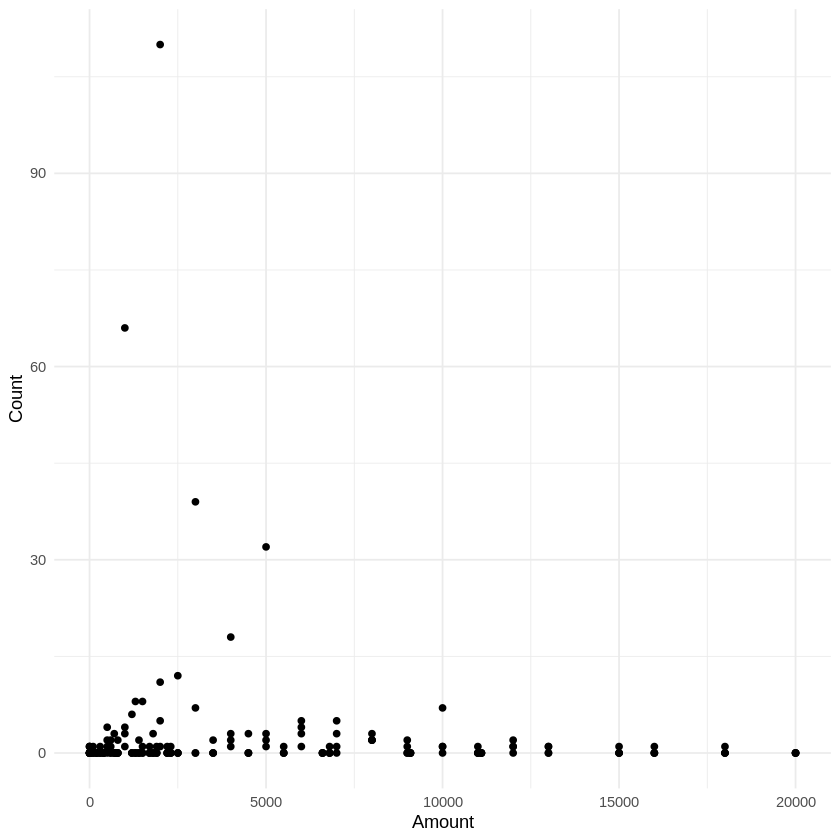

In [60]:
p10 <- ggplot(df_3, aes(x = Amount, y = Count))
# Scatter plot 
p10 <- p10 + geom_point()
p10 <- p10 + theme_minimal()
p10

In [61]:
# Split in vertical direction
p11 <- p10 + facet_grid(method_f ~ ., margins=TRUE)

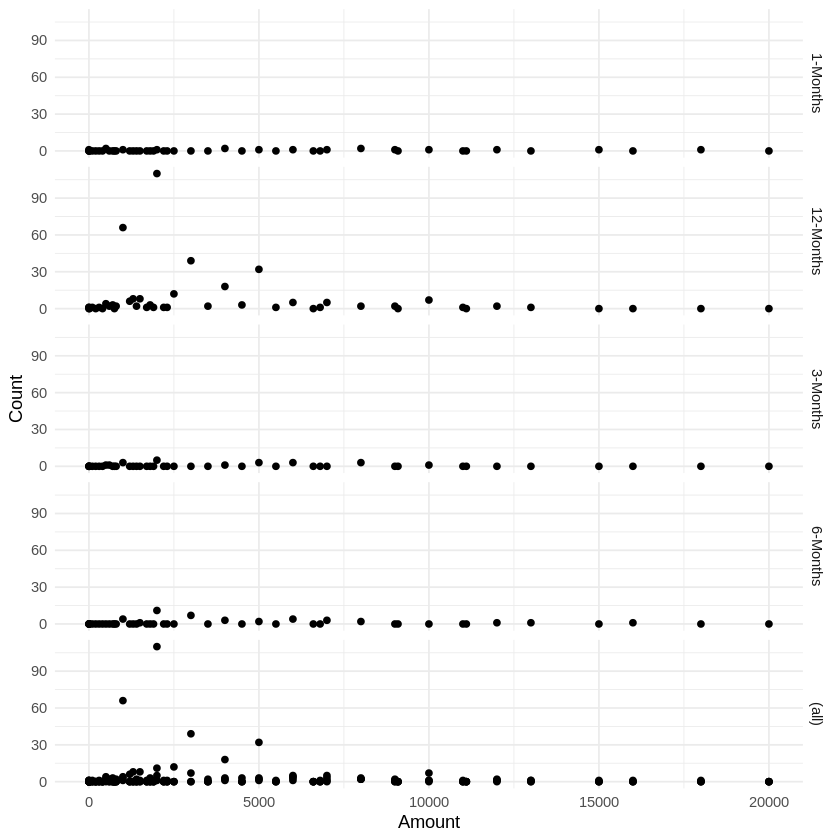

In [62]:
p11

# histograms

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



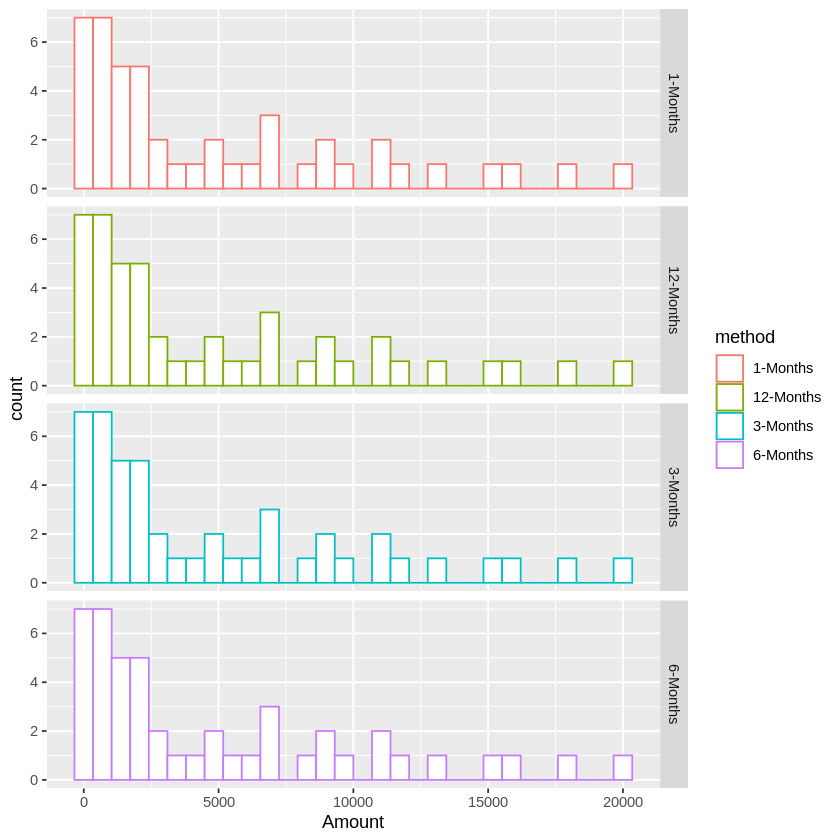

In [50]:
# Interleaved histograms
ggplot(df_3, aes(x=Amount, color=method)) +
  geom_histogram(fill="white", position="dodge") + 
  facet_grid(method ~ .)